In [51]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [196]:
# Generate data
X, y= make_blobs(centers= 4, n_samples= 500, n_features= 2, shuffle= True, random_state= 42)
print(X.shape)

(500, 2)


**K Means ++ algorithm for better initialization**<br>
1. Select the first centroid at random.<br>
2. a. Now calculate the distant between all the points which are not centroid and the closet centroid point.<br>
    b. Normalize the calculated distance and use the normalized distance as probability distribution for selecting the next centroid.<br>
    The point with the largest distance has higher probability to get selected as the next centroid.<br>
3. Repeat step 2 until all the centroids are calculated.

In [197]:
n_sample, n_feat = X.shape
k = 4
centroids = np.zeros((k, n_feat))

In [207]:
# Find the distance between centroids and data points
np.random.seed(42)

idx1 = np.random.choice(range(n_sample), size=1, replace=False)
centroids[0] = X[idx1]
distances = []

for i in range(1, k):
    # Calculate the distance between last centroid and all the remaining points.
    distance =  ((X - centroids[i-1]) *
                (X - centroids[i-1])).sum(axis=1)
    distances.append(distance)
    # Find the minimum distance among all the centroids.
    distance2 = np.min(distances, axis=0)
    # Normalise the calculated distances to form probability distribution.
    prob = distance2 / distance2.sum()
    # Find the next centroid based on the calculated prob distribution.
    centroid_next = np.random.choice(range(n_sample), size=1, p=prob)
    # centroid_next = prob.argmax()
    print(X[centroid_next])
    centroids[i] = X[centroid_next]

[[-8.90849347  5.66256198]]
[[-5.21415275 -5.86573953]]
[[3.74146416 2.46508886]]


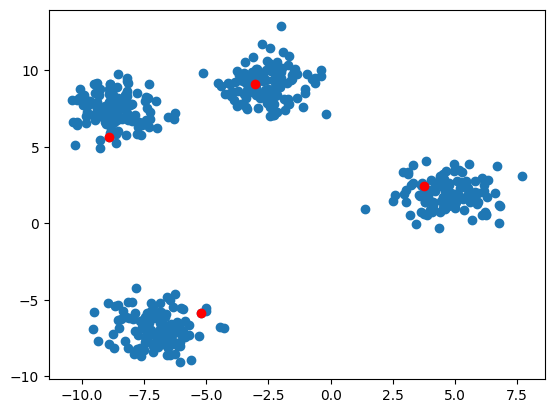

In [208]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
# plt.scatter(centroids2[:, 0], centroids2[:, 1], c='k')

In [209]:
def assign_cluster_labels(X, centroids):
    """
        To assign cluster labels to every sample.
        X: training data set.
        centroids: numpy array containing the current centroids. shape: [k, X.shape[1]]
    """
    distances = np.zeros((len(centroids), X.shape[0]))
    for i, centroid in enumerate(centroids):
        distance = np.sum((X - centroid) * (X - centroid), axis=1)
        distances[i] = distance
    out = np.argmin(distances, axis=0)
    return out

def assign_cluster_labels_parallel(X, centroids: np.array) -> np.array:
    """
        To assign cluster labels to every sample.
        X: training data set.
        centroids: numpy array containing the current centroids. shape: [k, X.shape[1]]
    """
    # Reshape the centroid array to parallelize jthe distance calculation.
    centroids3d = centroids.reshape(centroids.shape[0], 1, centroids.shape[1])    # shape: [k,1, X.shape[1]]
    distance = ((X - centroids3d) * (X - centroids3d)).sum(axis=-1)     # shape: [k, X.shape[1]]
    out = distance.argmin(axis=0)   # shape: [x.shape[1]]
    return out

In [201]:
# [Test Code]: Parallelizing the distance calculation
arr = np.random.randn(10, 2)
print(arr)
arr_centroids = np.array([arr[0],
                      arr[2]])
print(arr_centroids)

[[ 0.97263287  1.54447484]
 [ 0.34406813  0.92623254]
 [ 0.60783854  1.03251279]
 [-1.03440236  0.20428294]
 [ 0.48121773  0.46705717]
 [ 1.13701742  0.44689014]
 [-1.14494852  0.59131612]
 [-0.88307866 -0.69937805]
 [-0.41850888 -0.11141878]
 [-1.5437254   1.11689344]]
[[0.97263287 1.54447484]
 [0.60783854 1.03251279]]


In [211]:
centroid_labels = assign_cluster_labels(arr, arr_centroids)
centroid_labels_parallel = assign_cluster_labels_parallel(arr, arr_centroids)
# Both the assign 
(centroid_labels == centroid_labels_parallel).all()

True

In [219]:
def update_centroids(X, current_centroids, assigned_centroids):
    new_centroids = []
    for i in range(len(current_centroids)):
        idx_i = assigned_centroids[assigned_centroids == i]
        new_centroid = X[idx_i].mean(axis=0)
        new_centroids.append(new_centroid)
    out = np.array(new_centroids)
    return out

In [220]:
cluster_labels = assign_cluster_labels(X, centroids)
centroids_updated = update_centroids(X, centroids, cluster_labels)

In [221]:
centroids_updated

array([[-7.68905443,  6.62034649],
       [-9.57651383, -6.93440446],
       [ 6.82968177,  1.1648714 ],
       [-2.90130578,  7.55077118]])

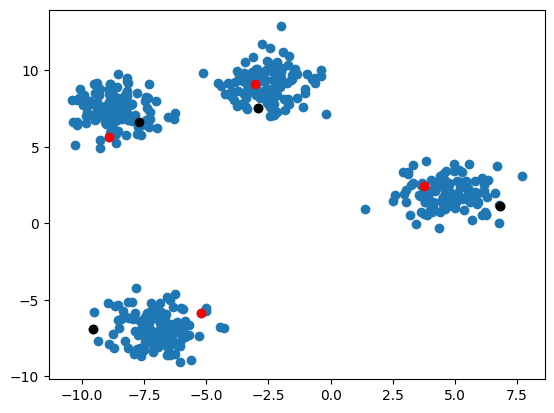

In [222]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
plt.scatter(centroids_updated[:, 0], centroids_updated[:, 1], c='k')